# Project
#### -  Type: Supervised Learning
#### -  Sub-type: Regression
#### - Data Type: Structured
#### - Analytics Type: Predictive Analytics

# Predicting Health Index Scores Based on Lifestyle Habits using Regression Models

## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('synthetic_health_data.csv')

In [3]:
df.head()

,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Smoking_Status,Alcohol_Consumption,Health_Score
0,45.960570,31.996777,5,55.403270,7.300359,0,2.834707,70.542122
1,38.340828,29.623168,6,41.838357,7.012419,1,7.199517,57.244637
2,47.772262,25.298152,5,76.904948,6.028641,1,4.097944,96.333722
3,58.276358,21.765316,2,49.756767,5.802714,1,3.649377,61.321783
4,37.190160,28.491117,2,44.218737,7.912548,0,2.839795,67.175894


## 2. Data Exploration
Now let's take a look at the data we are dealing with here are some useful info we can get from this phase:
1. Better understanding of our features.
2. Statistical characteristics of our dataset.
3. the shape of the data
4. Data types and null values in each feature, if any exist
5. Checking some samples.

By answering these questions preprocessing will be much easier

### 2.1. Renaming  

In [4]:
df = df.rename(columns={'Age': 'age',
                        'BMI': 'bmi',
                        'Exercise_Frequency': 'ex_freq',
                        'Diet_Quality': 'diet',
                        'Sleep_Hours': 'sleep_hrs',
                        'Smoking_Status': 'smoke',
                        'Alcohol_Consumption': 'alcohol',
                       })

In [5]:
# Selecting multiple columns correctly
continuous = df[['age', 'bmi', 'diet', 'sleep_hrs', 'alcohol']]
categorical = df[['ex_freq']]  # If it's a single column, keep it inside a list
count = df[['smoke']]  # Make sure the column name is spelled correctly

### 2.2. Column Dtype Correction

In [6]:
df.dtypes

age             float64
bmi             float64
ex_freq           int64
diet            float64
sleep_hrs       float64
smoke             int64
alcohol         float64
Health_Score    float64
dtype: object

In [7]:
df['age'] = df['age'].astype('int')

In [8]:
#Reducing decimal values
df['bmi'] = df['bmi'].round(2)
df['diet'] = df['diet'].round(2)
df['sleep_hrs'] = df['sleep_hrs'].round(2)
df['alcohol'] = df['alcohol'].round(2)
df["Health_Score"] = df["Health_Score"].round(2)

In [9]:
df.head(1)

,age,bmi,ex_freq,diet,sleep_hrs,smoke,alcohol,Health_Score
0,45,32.0,5,55.4,7.3,0,2.83,70.54


### 2.3. Correlation Between columns

In [10]:
df.corr()

,age,bmi,ex_freq,diet,sleep_hrs,smoke,alcohol,Health_Score
age,1.000000,-0.039600,0.010848,-0.016088,0.023869,0.002340,-0.022945,-0.186597
bmi,-0.039600,1.000000,0.007062,-0.039986,0.034525,-0.033789,-0.011089,-0.415171
ex_freq,0.010848,0.007062,1.000000,-0.021849,0.021967,0.024958,-0.011615,0.245039
diet,-0.016088,-0.039986,-0.021849,1.000000,0.009579,0.010283,0.000087,0.680678
sleep_hrs,0.023869,0.034525,0.021967,0.009579,1.000000,-0.022324,-0.020615,0.268941
smoke,0.002340,-0.033789,0.024958,0.010283,-0.022324,1.000000,-0.025073,-0.109116
alcohol,-0.022945,-0.011089,-0.011615,0.000087,-0.020615,-0.025073,1.000000,-0.138297
Health_Score,-0.186597,-0.415171,0.245039,0.680678,0.268941,-0.109116,-0.138297,1.000000


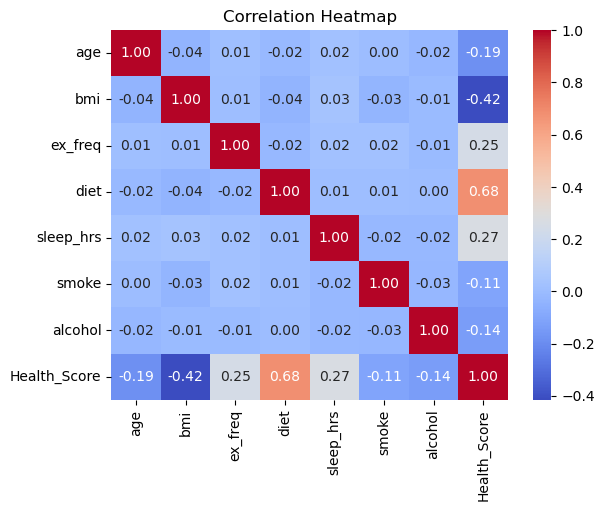

In [11]:
sns.heatmap(df.corr(), annot = True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
df.shape

(1000, 8)

### 2.4. Detecting missing values

In [13]:
df.isnull().sum()

age             0
bmi             0
ex_freq         0
diet            0
sleep_hrs       0
smoke           0
alcohol         0
Health_Score    0
dtype: int64

### 2.5. Descriptive Statistics

In [14]:
df.describe()

,age,bmi,ex_freq,diet,sleep_hrs,smoke,alcohol,Health_Score
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,39.742000,25.354120,2.888000,69.95300,6.973100,0.499000,3.079520,85.480010
std,11.751491,4.987314,1.995354,14.97206,1.517226,0.500249,2.084588,13.633855
min,1.000000,10.300000,0.000000,19.91000,2.430000,0.000000,-3.590000,29.110000
25%,32.000000,21.967500,1.000000,59.94500,5.907500,0.000000,1.647500,76.432500
50%,40.000000,25.315000,3.000000,69.97500,6.990000,0.000000,3.065000,87.500000
75%,47.000000,28.645000,5.000000,80.53000,8.052500,1.000000,4.487500,99.762500
max,86.000000,40.970000,6.000000,110.27000,11.640000,1.000000,11.110000,100.000000


**Now to the more statistical POV**


we can see that there are all kinds of people in our dataset.

1. The age range of these people is between 1-86 and their average age is 40.
2. Exercise frequencies are average in the scale type
3. Sleep patterns are approximately 7 hours on average.
4. Health score levels are 76 out of 100 points even in the lowest 25% and 99 out of 75%, so the conclusion we can draw from there is that health scores are high for now.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1000 non-null   int32  
 1   bmi           1000 non-null   float64
 2   ex_freq       1000 non-null   int64  
 3   diet          1000 non-null   float64
 4   sleep_hrs     1000 non-null   float64
 5   smoke         1000 non-null   int64  
 6   alcohol       1000 non-null   float64
 7   Health_Score  1000 non-null   float64
dtypes: float64(5), int32(1), int64(2)
memory usage: 58.7 KB


## 3. Data Analysis

### Univariate Analysis

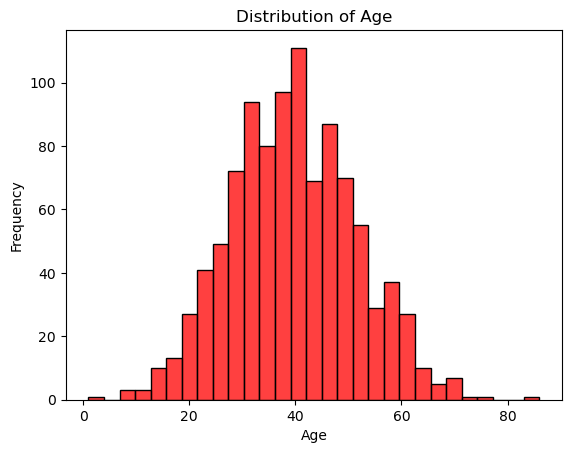

In [16]:
sns.histplot(df['age'], color = 'red')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**What can we conclude from this distribution ?**
- The data is **normally distributed** it shows some sort of regular pattern with one peak.
- Age histogram have outliers.

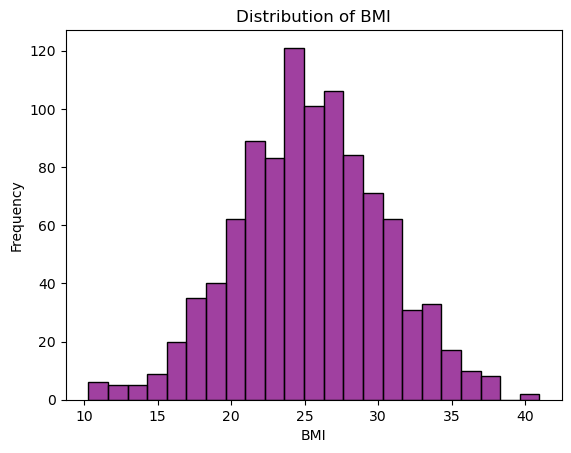

In [17]:
sns.histplot(df['bmi'], color = 'purple')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [18]:
df.columns

Index(['age', 'bmi', 'ex_freq', 'diet', 'sleep_hrs', 'smoke', 'alcohol',
       'Health_Score'],
      dtype='object')

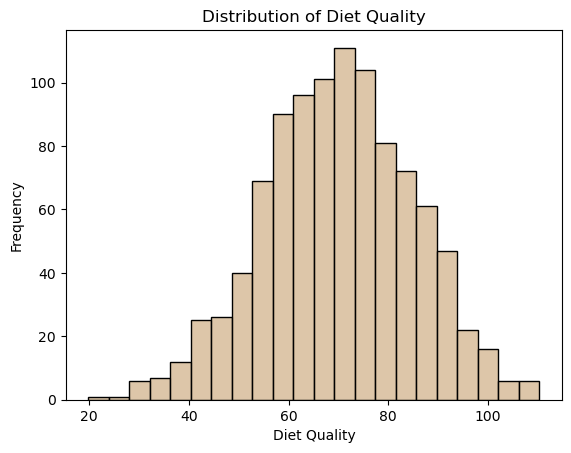

In [19]:
sns.histplot(df['diet'], color='tan')
plt.title('Distribution of Diet Quality')
plt.xlabel('Diet Quality')
plt.ylabel('Frequency')
plt.show()

In [20]:
df['diet'] = df['diet'].apply(lambda x: 0 if x < 0 else (100 if x > 100 else x))

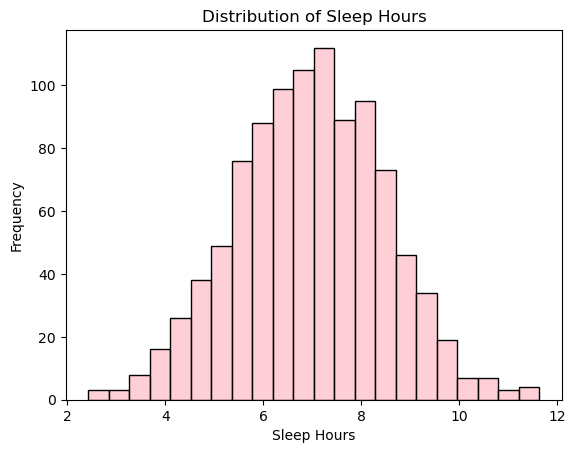

In [21]:
sns.histplot(df['sleep_hrs'], color = 'pink')
plt.title('Distribution of Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Frequency')
plt.show()

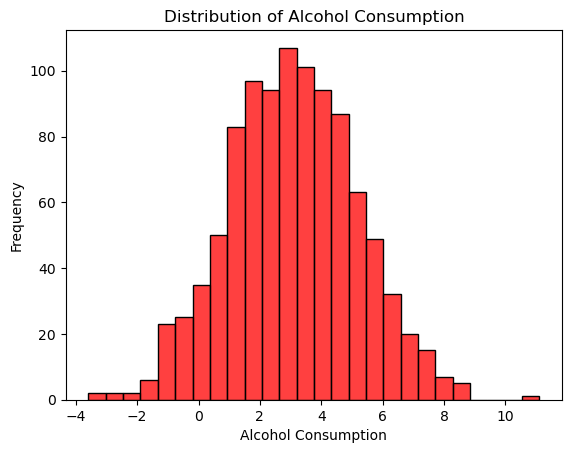

In [22]:
sns.histplot(df['alcohol'], color = 'red')
plt.title('Distribution of Alcohol Consumption')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Frequency')
plt.show()

The histogram indicates values as low as -2, but in reality, negative values should represent non-consumption of alcohol. Therefore, I am converting all negative values to zero to accurately reflect the data.


In [23]:
df['alcohol'] = df['alcohol'].apply(lambda x: 0 if x < 0 else x)

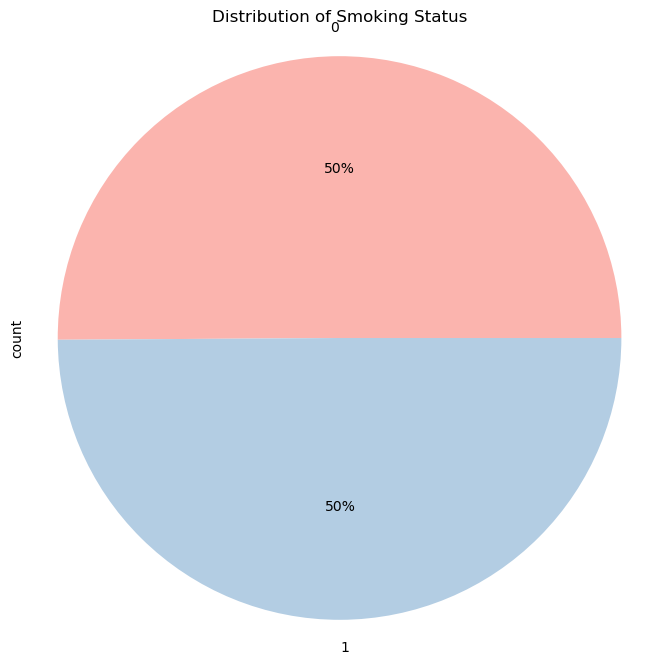

In [24]:
# Count values of 'smoke' column
count = df['smoke'].value_counts()

# Create figure
fig, ax = plt.subplots(figsize=(8,8))

# Plot pie chart
count.plot.pie(autopct='%1.0f%%', colors=plt.get_cmap('Pastel1').colors, ax=ax)

# Set title
ax.set_title('Distribution of Smoking Status')

# Make the pie chart circular
ax.axis('equal')

# Show plot
plt.show()

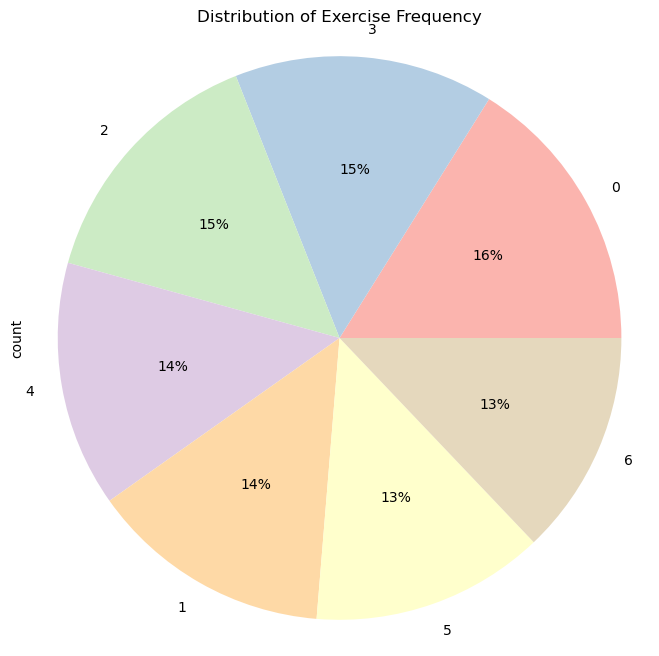

In [25]:
count = df['ex_freq'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))

count.plot.pie(autopct = '%1.0f%%', colors=plt.get_cmap('Pastel1').colors)
ax.set_title('Distribution of Exercise Frequency')
ax.axis('equal')
plt.show()

**So we have a nearly equal distribution of the 6 types exercise frequency**

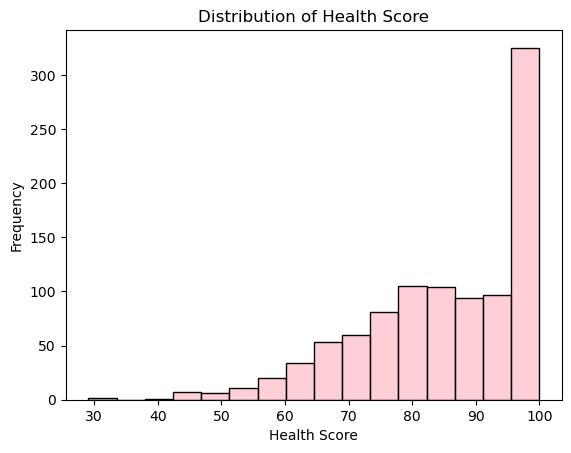

In [26]:
sns.histplot(df['Health_Score'], color = 'pink')
plt.title('Distribution of Health Score')
plt.xlabel('Health Score')
plt.ylabel('Frequency')
plt.show()

- The Health Score is **left Skewed**

**Now, that we know that the health score is high, we can look at graphs between the two types of data that show an inverse relationship**

<Axes: xlabel='Health_Score'>

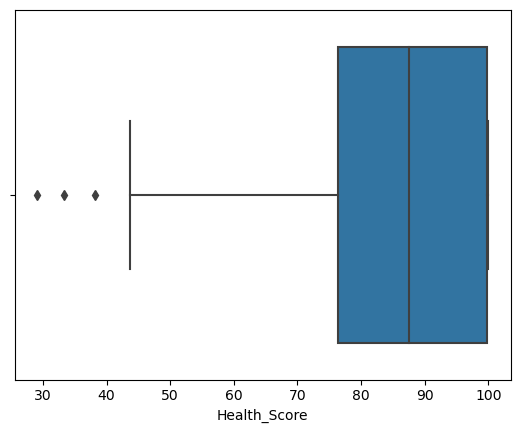

In [27]:
# Let's draw boxplot for our target variable Health_Score
sns.boxplot( x= df['Health_Score'])

- Our Box-Plot Chart is skewed to the left.
- Our health score is between 75-100 and is positive
- We have 3 extreme values that are not in our range, between 30-40.

In [28]:
df.columns

Index(['age', 'bmi', 'ex_freq', 'diet', 'sleep_hrs', 'smoke', 'alcohol',
       'Health_Score'],
      dtype='object')

In [29]:
# Export the clean data (assuming `df` is your cleaned DataFrame) to a CSV file
df.to_csv('Health_Data.csv', index=False)  # index=False to avoid writing row numbers


### Feature Selection

In [30]:
X = df[['age', 'bmi', 'ex_freq', 'diet', 'sleep_hrs', 'smoke', 'alcohol']]
y = df['Health_Score']

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=68)

# 1. Linear Models

## 1.1. Linear Regression

In [32]:
# Import the LinearRegression model
from sklearn.linear_model import LinearRegression

# Create an instance of the model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the training and testing data
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

# mean_squared_error metric
from sklearn.metrics import mean_squared_error

print('Train RMSE:', np.sqrt(mean_squared_error(y_train, ypred_train)))

Train RMSE: 5.607502843348906


In [33]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# Test and Train R² scores
print('Test Accuracy:', r2_score(y_test, ypred_test))
print('\nTrain Accuracy:', r2_score(y_train, ypred_train))
# Cross Validation Score
print('Cross Validation Score:', cross_val_score(model, X, y, cv=5, scoring='r2').mean())

Test Accuracy: 0.8464429540106522

Train Accuracy: 0.8337965475296389
Cross Validation Score: 0.8313199899345738


## 1.2. Polynomial Regression

**Hyperparameter Tuning**

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

train_r2 = []
test_r2 = []

i = range(1, 10)

for degree in i:
    
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Modeling
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Prediction and Evaluation
    train_pred = model.predict(X_train_poly)
    test_pred = model.predict(X_test_poly)

    # Store R² Scores
    train_r2.append(r2_score(y_train, train_pred))
    test_r2.append(r2_score(y_test, test_pred))

# Check results
for degree, tr, te in zip(i, train_r2, test_r2):
    print(f"Degree {degree}: Train R² = {tr:.4f}, Test R² = {te:.4f}")


Degree 1: Train R² = 0.8338, Test R² = 0.8464
Degree 2: Train R² = 0.6040, Test R² = 0.6821
Degree 3: Train R² = 0.8992, Test R² = 0.8795
Degree 4: Train R² = 0.9395, Test R² = 0.8084
Degree 5: Train R² = 0.9838, Test R² = -8.1211
Degree 6: Train R² = 1.0000, Test R² = -379.4652
Degree 7: Train R² = 1.0000, Test R² = -414.2562
Degree 8: Train R² = 1.0000, Test R² = -416.4455
Degree 9: Train R² = 1.0000, Test R² = -502.4870


After hypertunning, Degree 3 is perfect

In [35]:
# Import the PolynomialFeatures class
from sklearn.preprocessing import PolynomialFeatures

# Create a converter to generate polynomial features of degree 3
converter = PolynomialFeatures(degree=3)
# Transform the training data to include polynomial features
X_train_poly = pd.DataFrame(converter.fit_transform(X_train))
# Transform the testing data to include polynomial features
X_test_poly = pd.DataFrame(converter.fit_transform(X_test))


In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Train the model using the training data
model.fit(X_train_poly, y_train)

LinearRegression()

In [37]:
ypred_train = model.predict(X_train_poly)
ypred_test = model.predict(X_test_poly)

In [38]:
from sklearn.metrics import mean_squared_error

print('Train RMSE:',np.sqrt(mean_squared_error(y_train, ypred_train)))

Train RMSE: 4.366512860380456


In [39]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

print('Test Accuracy:',r2_score(y_test, ypred_test))
print('\nTrain Accuracy:',r2_score(y_train, ypred_train))
print('Cross Validation Score:',cross_val_score(model, X_train_poly,y_train, cv=5, scoring='r2').mean())

Test Accuracy: 0.8795067635509762

Train Accuracy: 0.8992208889561051
Cross Validation Score: 0.8567712820203169


## 1.3. Lasso Regression

Applying hyperparameter tuning using GridSearchCV

In [40]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Create a Lasso regression model (estimator)
estimator = Lasso()

# Define the hyperparameter grid (alpha values from 1 to 99)
param_grid = {'alpha': list(range(1, 100))}

# Set up GridSearchCV with 5-fold cross-validation and R2 score for evaluation
model = GridSearchCV(estimator, param_grid, cv=5, scoring='r2')

# Train the model on the training data
model.fit(X_train, y_train)

# Print the best alpha value found by GridSearchCV
print(model.best_params_)


{'alpha': 1}


In [41]:
# Import the Lasso regression model
from sklearn.linear_model import Lasso

# Create a Lasso model with alpha set to 1
lasso = Lasso(alpha=1)
# Train the Lasso model using the training data
lasso.fit(X_train, y_train)

Lasso(alpha=1)

In [42]:
print('Intercept (B0):',lasso.intercept_)
print('Coefficients (B1):',lasso.coef_)

Intercept (B0): 62.8104006096455
Coefficients (B1): [-0.21698907 -1.07352439  1.47620134  0.60532382  2.05123504 -0.
 -0.7730205 ]


In [43]:
ypred_train = lasso.predict(X_train)

In [44]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

print('Train R2:',r2_score(y_train, ypred_train))
print('CV Score:',cross_val_score(lasso, X_train, y_train, cv=5, scoring='r2').mean())

Train R2: 0.811714583344223
CV Score: 0.8070403003367967


In [45]:
ypred_test = lasso.predict(X_test)
print('Test R2:', r2_score(y_test, ypred_test))

Test R2: 0.8214354422727748


## 1.4. Ridge Regression

Hyperparameter Tuning using Grid Search CV

In [46]:
# Import the Ridge regression model
from sklearn.linear_model import Ridge

# Create a Ridge regression estimator
estimator = Ridge()
# Define the hyperparameter grid (alpha values from 1 to 99)
param_grid = {'alpha': list(range(1, 100))}
# Set up GridSearchCV with 5-fold cross-validation and R2 score for evaluation
model = GridSearchCV(estimator, param_grid, cv=5, scoring='r2')
# Train the model on the training data
model.fit(X_train, y_train)
# Display the best alpha value found by GridSearchCV
model.best_params_

{'alpha': 5}

In [47]:
ridge = Ridge(alpha=5)
ridge.fit(X_train, y_train)

Ridge(alpha=5)

In [48]:
print('Intercept (B0):',lasso.intercept_)
print('Coefficients (B1):',lasso.coef_)

Intercept (B0): 62.8104006096455
Coefficients (B1): [-0.21698907 -1.07352439  1.47620134  0.60532382  2.05123504 -0.
 -0.7730205 ]


In [49]:
ypred_train = ridge.predict(X_train)

In [50]:
print('Train R2:', r2_score(y_train, ypred_train))
print('CV Score:', cross_val_score(ridge, X_train, y_train, cv=5).mean())

Train R2: 0.8337856889106701
CV Score: 0.8288648665613778


In [51]:
ypred_test = ridge.predict(X_test)
print('Test R2:',r2_score(y_test, ypred_test))

Test R2: 0.8463725142759804


## 1.5. ElasticNet Regression

HyperParameter Tuning using Grid Search CV

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# Create an ElasticNet regression estimator
estimator = ElasticNet()

# Define the hyperparameter grid for alpha and l1_ratio values
param_grid = {'alpha': [0.1, 0.2, 1, 2, 3, 5, 10], 
              'l1_ratio': [0.1, 0.5, 0.75, 0.9, 0.95, 1]}

# Set up GridSearchCV with 5-fold cross-validation and R2 score for evaluation
model = GridSearchCV(estimator, param_grid, cv=5, scoring='r2')

# Train the model on the training data
model.fit(X_train, y_train)

# Display the best hyperparameters found by GridSearchCV
print(model.best_params_)

{'alpha': 0.1, 'l1_ratio': 1}


In [53]:
#Modelling
model = ElasticNet(alpha=0.1, l1_ratio=1)
model.fit(X_train, y_train)

print('Intercept:',model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 63.46921422423472
Coefficients: [-0.22686906 -1.11599365  1.7341554   0.60788021  2.37781464 -3.1858221
 -1.02234859]


In [54]:
print('Train R2:',model.score(X_train, y_train))
print('Cross Validation Score:', cross_val_score(model, X, y, cv=5).mean())

Train R2: 0.8335308549849251
Cross Validation Score: 0.8310497485177952


In [55]:
print('Test R2:',model.score(X_test, y_test))

Test R2: 0.845945948496273


# 2. Tree-Based Models

## 2.1 Decision Tree Regressor

- Hyperparameters tunning

In [56]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Create a DecisionTreeRegressor model with a fixed random_state for reproducibility
tree = DecisionTreeRegressor(random_state=42)

# Define the hyperparameter grid for max_depth, min_samples_split, and min_samples_leaf
param_grid = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5] 
}
# Set up GridSearchCV with 5-fold cross-validation and R2 score for evaluation
gridsearch = GridSearchCV(tree, param_grid, cv=5, scoring='r2', n_jobs=-1)
# Train the model on the training data
gridsearch.fit(X_train, y_train)

# Print the best hyperparameters and the best cross-validation score
print('The Best Parameters:', gridsearch.best_params_)
print('The Best CV Score:', gridsearch.best_score_)

The Best Parameters: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
The Best CV Score: 0.5911940171949708


In [57]:
# Model
model = DecisionTreeRegressor(max_depth = 20,
                              min_samples_leaf = 5,
                              min_samples_split = 2)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20, min_samples_leaf=5)

In [58]:
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)


print('Train Accuracy:',r2_score(y_train, ypred_train))
print('Train Accuracy:',model.score(X_train, y_train))

print('CV Score:',cross_val_score(model, X, y, cv=5, 
                                  scoring='r2').mean())

Train Accuracy: 0.892802926253399
Train Accuracy: 0.892802926253399
CV Score: 0.5711451700129275


## 2.2 Random Forest Regressor

In [59]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=43)
rf.fit(X_train, y_train)

print('Train Accuracy:',rf.score(X_train, y_train))
print('CV Score:',cross_val_score(rf, X,y, cv=5, scoring='r2').mean())

Train Accuracy: 0.9719352650296927
CV Score: 0.8025288550993389


#### HyperParameter Tuning using GridSearchCV

In [60]:
from sklearn.model_selection import GridSearchCV

# 1. Define Parameter Grid
param_grid = param_grid = {
    'n_estimators': [50, 100, 200],       # number of trees
    'max_depth': [5, 10, 20],              # how deep a tree can go
    'min_samples_split': [2, 5, 10],       # min samples to split an internal node
    'min_samples_leaf': [1, 2, 4],         # min samples required at a leaf node
    #'max_features': ['auto', 'sqrt', 'log2'], # number of features to consider at each split
    #'bootstrap': [True, False]             # whether bootstrap samples are used
}

# 2. Setup GridSearch
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# 3. Fit
grid_search.fit(X_train, y_train)

# 4. Results
print('Best Parameters:', grid_search.best_params_)
print('Best CV R² Score:', grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best CV R² Score: 0.8013899288500372


In [61]:

rf = RandomForestRegressor(max_depth = 20,
                           min_samples_leaf=2,
                           min_samples_split=2, 
                           n_estimators=200)
rf.fit(X_train, y_train)

print('Train Accuracy:',rf.score(X_train, y_train))
print('CV Score:',cross_val_score(rf, X,y, cv=5, scoring='r2').mean())

Train Accuracy: 0.9590553380458351
CV Score: 0.8022180552444758


# 3. Boosting Models

## 3.1. Gradient Boosting Regressor

In [62]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

gbr = GradientBoostingRegressor(random_state=43)
gbr.fit(X_train, y_train)

print('Train Accuracy:',gbr.score(X_train, y_train))
print('CV Score:', cross_val_score(gbr, X, y, cv=5, scoring='r2').mean())

Train Accuracy: 0.94451143071305
CV Score: 0.8411570631745281


#### HyperParameter Tuning

In [63]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

gbr = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [100,200,300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3,5,7],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,5]
}

gbr_cv = GridSearchCV(estimator=gbr, param_grid=param_grid, 
                      scoring='r2', cv=5, verbose=2, n_jobs=-1)


gbr_cv.fit(X_train, y_train)

print("Best Parameters:", gbr_cv.best_params_)
print("Best CV Score:", gbr_cv.best_score_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 300}
Best CV Score: 0.8451345071436462


In [64]:
gbr = GradientBoostingRegressor(learning_rate = 0.05, 
                                max_depth = 3,
                                min_samples_leaf = 5,
                                min_samples_split = 2,
                                n_estimators = 300)
gbr.fit(X_train, y_train)

print('Train Accuracy:',gbr.score(X_train, y_train))
print('CV Score:', cross_val_score(gbr, X, y, cv=5, scoring='r2').mean())

Train Accuracy: 0.9522963572528155
CV Score: 0.8558831134393274


In [65]:
print("Final Test Accuracy:",gbr.score(X_test, y_test)) 

Final Test Accuracy: 0.8593945819950797


## 3.2. XGBoost Regressor

In [66]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state = 43)
xgb.fit(X_train, y_train)

print('Train Accuracy:', xgb.score(X_train, y_train))
print('CV Score:',cross_val_score(xgb, X,y, cv=5, scoring='r2').mean())
print('\nTest Accuracy:', xgb.score(X_train, y_train))

Train Accuracy: 0.9997891444092526
CV Score: 0.7984455111437271

Test Accuracy: 0.9997891444092526


HyperParameter Tuning using GridSearchCV

In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3,5,7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb = XGBRegressor(random_state = 43)

cv = GridSearchCV(estimator = xgb, param_grid = param_grid, 
                  scoring = 'r2', cv=5, verbose = 2, n_jobs = -1)

cv.fit(X_train, y_train)

print('Best Parameters:', cv.best_params_)
print('Best CV Score:', cv.best_score_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.7}
Best CV Score: 0.858182916977291


In [68]:
xgb = XGBRegressor(random_state = 43, n_estimators = 300,
                   learning_rate = 0.05, max_depth = 3,
                   subsample = 0.7, colsample_bytree = 0.8)
xgb.fit(X_train, y_train)

print('Train Accuracy:',xgb.score(X_train, y_train))
print('CV Score:',cross_val_score(xgb, X,y, cv=5, scoring='r2').mean())

Train Accuracy: 0.9473844939678688
CV Score: 0.8625516457430729


# 4. Hybrid Model built from models with the highest CV scores.

In [69]:
from sklearn.ensemble import VotingRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Initialize individual models
xgb_model = XGBRegressor(random_state=43, n_estimators=300,
                         learning_rate=0.05, max_depth=3,
                         subsample=0.7, colsample_bytree=0.8)

rf_model = RandomForestRegressor(max_depth=20, min_samples_leaf=2,
                                 min_samples_split=2, n_estimators=200)

gb_model = GradientBoostingRegressor(learning_rate = 0.05, max_depth = 3,
                                min_samples_leaf = 5,min_samples_split = 2,
                                n_estimators = 300)
lr_model = LinearRegression()

# Create the Voting Regressor with Gradient Boosting included
hybrid = VotingRegressor(estimators=[('lr', lr_model), 
                                     ('rf', rf_model), 
                                     ('xgb', xgb_model),
                                     ('gb', gb_model)])

# Fit the Voting Regressor
hybrid.fit(X_train, y_train)

# Predict with the Voting Regressor
hybrid_pred = hybrid.predict(X_test)

# Mean Squared Error
print("Hybrid Model - Mean Squared Error:", mean_squared_error(y_test, hybrid_pred))

# Evaluate the hybrid model
print("Hybrid Model - Train Accuracy Score:", r2_score(y_test, hybrid_pred))

# Cross-validation for the hybrid model
print("Hybrid Model - Cross-Validation R² Score:", cross_val_score(hybrid, X, 
                                                                   y, cv=5, 
                                                                   scoring='r2').mean())


Hybrid Model - Mean Squared Error: 22.97394870943216
Hybrid Model - Train Accuracy Score: 0.8654444055682923
Hybrid Model - Cross-Validation R² Score: 0.8612251837817952


In [70]:
# Step 1: Prepare custom input values (example)
custom_data = np.array([[25, 28.4, 1, 37.3, 4, 1, 5.5]])

# Step 2: Make predictions using the hybrid model (Voting Regressor)
prediction = hybrid.predict(custom_data)

# Step 3: Display the hybrid model's prediction for the custom input
print("Hybrid Model Prediction for Custom Input:", prediction)


Hybrid Model Prediction for Custom Input: [50.97849519]


### Exporting the hybrid model in Pickle file

In [72]:
import pickle

# Save the trained hybrid model to a pickle file
with open('hybrid_model.pkl', 'wb') as file:
    pickle.dump(hybrid, file)

print("Hybrid model saved successfully as 'hybrid_model.pkl'")

Hybrid model saved successfully as 'hybrid_model.pkl'


### To Load the pickle File

In [73]:
# Load the saved hybrid model
with open('hybrid_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Predict using the loaded model
predictions = loaded_model.predict(X_test)

# Evaluate if needed
print("Loaded Model - R² Score:", r2_score(y_test, predictions))


Loaded Model - R² Score: 0.8654444055682923
